## 1. 决策树分裂【gini系数】

In [1]:
import numpy as np
import pandas as pd
y = np.array(list('NYYYYYNYYN'))
print(y)
X = pd.DataFrame({'日志密度':list('sslmlmmlms'),
                  '好友密度':list('slmmmlsmss'),
                  '真实头像':list('NYYYYNYYYY')})
X['日志密度'] = X['日志密度'].map({'s':0,'m':1,'l':2})
X['好友密度'] = X['好友密度'].map({'s':0,'m':1,'l':2})
X['真实头像'] = X['真实头像'].map({'N':0,'Y':1})
X

['N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N']


,日志密度,好友密度,真实头像
0,0,0,0
1,0,2,1
2,2,1,1
3,1,1,1
4,2,1,1
5,1,2,0
6,1,0,1
7,2,1,1
8,1,0,1
9,0,0,1


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import graphviz # 第三方库，pip install graghviz
from sklearn import tree

model = DecisionTreeClassifier(criterion='gini')
model.fit(X,y)

DecisionTreeClassifier()

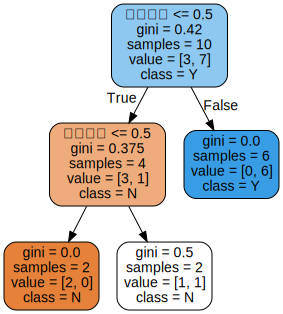

In [3]:
# 图片数据
dot_data = tree.export_graphviz(model, out_file=None, 
                            feature_names= X.columns,# 特征名
                            class_names=np.unique(y),# 类别名
                            filled=True, # 填充颜色
                            rounded=True) # 圆角

graph = graphviz.Source(dot_data)
graph

#### 手动计算未分类前gini=0.42 

In [4]:
0.375 * 0.4

0.15000000000000002

In [5]:
pd.Series(y).value_counts()

Y    7
N    3
Name: count, dtype: int64

In [6]:
p = pd.Series(y).value_counts()/len(y)
round((p * (1-p)).sum(),2)

0.42

#### 选择划分节点

In [7]:
X['真实用户'] = y # 数据合并
X

,日志密度,好友密度,真实头像,真实用户
0,0,0,0,N
1,0,2,1,Y
2,2,1,1,Y
3,1,1,1,Y
4,2,1,1,Y
5,1,2,0,Y
6,1,0,1,N
7,2,1,1,Y
8,1,0,1,Y
9,0,0,1,N


In [8]:
columns = ['日志密度','好友密度','真实头像']
lower_gini = 1 # 记录，最低信息熵，是多少
condition = {} # 记录最佳裂分点
for col in columns:
    x = X[col].unique()
    x.sort()
    # 如何划分问题
    for i in range(len(x) -1):
        split = x[i:i+2].mean()
        cond = X[col] <= split
        p = cond.value_counts()/cond.size
        indexes = p.index
        gini = 0
        for index in indexes:
            user = X[cond == index]['真实用户']
            p_user = user.value_counts()/user.size
            gini += (p_user * (1-p_user)).sum() * p[index]
        print(col,split,gini)
        if gini < lower_gini:
            condition.clear()
            lower_gini = gini
            condition[col] = split
print('最佳裂分条件是：',condition)

日志密度 0.5 0.3047619047619048
日志密度 1.5 0.3428571428571428
好友密度 0.5 0.15000000000000002
好友密度 1.5 0.375
真实头像 0.5 0.4
最佳裂分条件是： {'好友密度': 0.5}


## 2. 决策树实战

#### 决策树分类鸢尾花数据

In [15]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

iris = datasets.load_iris() # 字典类型的数据
X = iris['data']
y = iris['target']
name = iris['target_names'] # 特征，画图时使用

# 随机拆分
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 256)

# max_depth调整树深度：剪枝操作
# max_depth默认，深度最大，延伸到将数据完全划分开为止。
model = DecisionTreeClassifier(max_depth=None,criterion='entropy')
model.fit(X_train,y_train)

y_ = model.predict(X_test) # 将数据X_test放到，决策树中，特征条件，沿着某个分支，走走走，到叶节点
# 叶节点，是什么类别，这个数据，就判定为什么类别！！！

print('真实类别是：',y_test)
print('算法预测是：',y_)
print('准确率是：',model.score(X_test,y_test))

# 决策树提供了predict_proba这个方法，发现这个方法，返回值要么是0，要么是1
model.predict_proba(X_test)

真实类别是： [0 2 1 0 2 1 0 1 1 1 2 2 2 0 0 1 2 1 0 2 1 0 1 1 2 0 0 1 0 0 2 0 2 2 1 2 0
 0]
算法预测是： [0 2 1 0 2 1 0 1 1 1 2 2 2 0 0 1 2 1 0 2 1 0 1 1 2 0 0 1 0 0 2 0 1 2 1 2 0
 0]
准确率是： 0.9736842105263158


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

#### 决策树可视化

In [16]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

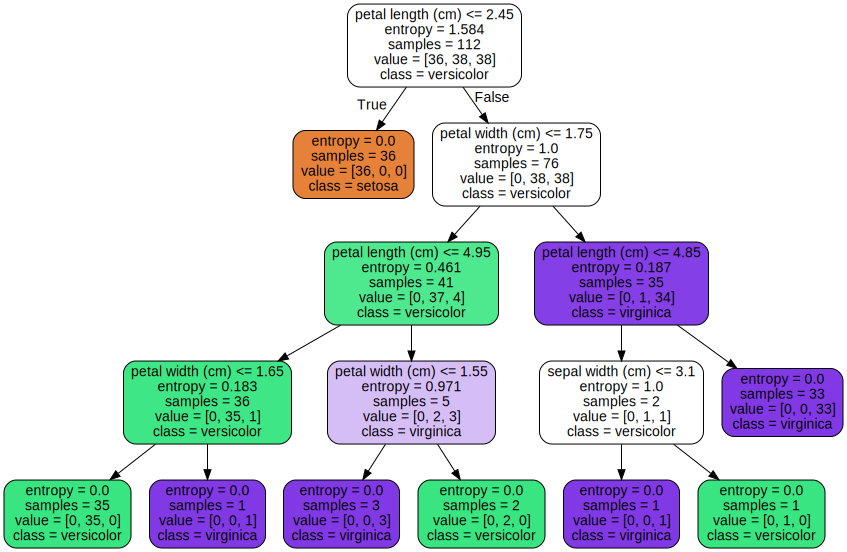

In [18]:
import graphviz
from sklearn import tree
# 导出数据
dot_data = tree.export_graphviz(model,feature_names= iris['feature_names'],
                     class_names= name,# 类别名
                     filled=True, # 填充颜色
                     rounded=True,)
graph = graphviz.Source(dot_data)
graph

#### 决策树的剪枝

准确率是： 0.6842105263157895


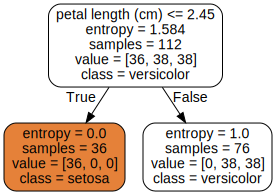

In [21]:
# max_depth调整树深度：剪枝操作
model = DecisionTreeClassifier(max_depth= 1,criterion='entropy')
model.fit(X_train,y_train)
print('准确率是：',model.score(X_test,y_test))
dot_data = tree.export_graphviz(model,feature_names= iris['feature_names'],
                     class_names= name,# 类别名
                     filled=True, # 填充颜色
                     rounded=True,)
graph = graphviz.Source(dot_data)
graph

准确率是： 0.9736842105263158


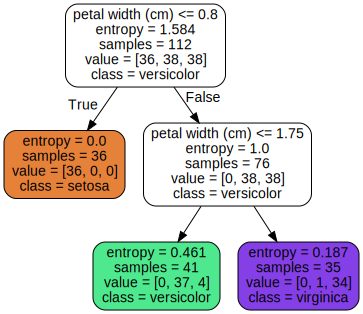

In [29]:
# min_impurity_decrease（节点划分最小不纯度）：剪枝操作
# 如果节点的不纯度（gini系数、信息熵）小于这个阈值，不分裂
# 鸡肋，一点点肉，不值当，gini变化，放弃
model = DecisionTreeClassifier(min_impurity_decrease = 0.2,criterion='entropy')
model.fit(X_train,y_train)
print('准确率是：',model.score(X_test,y_test))
dot_data = tree.export_graphviz(model,feature_names= iris['feature_names'],
                     class_names= name,# 类别名
                     filled=True, # 填充颜色
                     rounded=True,)
graph = graphviz.Source(dot_data)
graph

准确率是： 0.6842105263157895


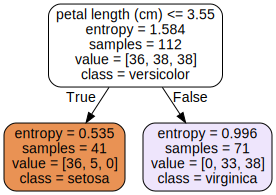

In [28]:
# min_samples_leaf 叶子节点最少样本树
model = DecisionTreeClassifier(min_samples_leaf=40,criterion='entropy')
model.fit(X_train,y_train)
print('准确率是：',model.score(X_test,y_test))
dot_data = tree.export_graphviz(model,feature_names= iris['feature_names'],
                     class_names= name,# 类别名
                     filled=True, # 填充颜色
                     rounded=True,)
graph = graphviz.Source(dot_data)
graph

#### 选择合适超参数【max_depth】

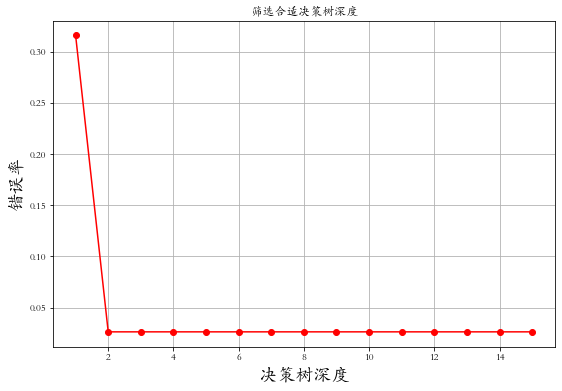

In [32]:
depth = np.arange(1,16)
err = [] # 列表，error误差，可以使用准确率表示accurate；err = 1 - accurate
for d in depth:
    model = DecisionTreeClassifier(criterion='entropy',max_depth=d)
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    err.append(1 - score)
#     print('决策树深度是%d，错误率为%0.3f%%' % (d ,100 * (1 - score)))
# 画图    
plt.figure(figsize=(9,6))
plt.rcParams['font.family'] = 'STKaiti'
plt.plot(depth,err,'ro-')
plt.xlabel('决策树深度',fontsize = 18)
plt.ylabel('错误率',fontsize = 18)
plt.title('筛选合适决策树深度')
plt.grid()

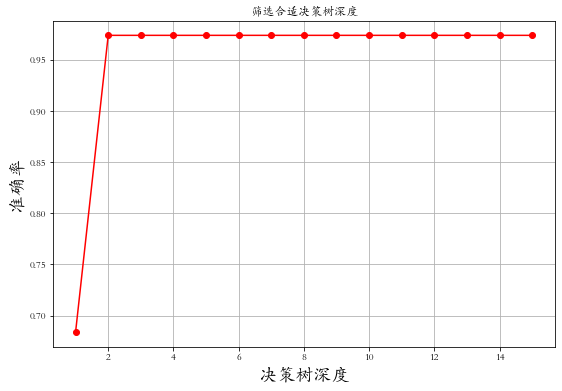

In [33]:
depth = np.arange(1,16)
acc = []
for d in depth:
    model = DecisionTreeClassifier(criterion='entropy',max_depth=d)
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    acc.append(score)
#     print('决策树深度是%d，错误率为%0.3f%%' % (d ,100 * (1 - score)))
# 画图    
plt.figure(figsize=(9,6))
plt.rcParams['font.family'] = 'STKaiti'
plt.plot(depth,acc,'ro-')
plt.xlabel('决策树深度',fontsize = 18)
plt.ylabel('准确率',fontsize = 18)
plt.title('筛选合适决策树深度')
plt.grid()

In [34]:
# 决策树，进行构建时，信息熵、gini系数构建
# 获取，不同属性的重要性【不同】
# 0，删除，也不会有影响
model.feature_importances_

array([0.        , 0.01126989, 0.6394416 , 0.3492885 ])